In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
#Lets's check the data formate
X_train[4].shape

(28, 28)

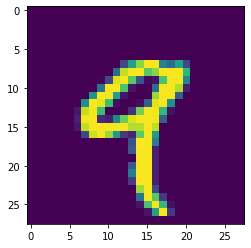

In [5]:
plt.imshow(X_train[4])

In [6]:
y_train[4]

9

## Data Preprocessing

In [7]:
image_height, image_width = 28,28

In [8]:
X_train = X_train.reshape(60000,image_height*image_width)
X_test = X_test.reshape(10000,image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train/=255.0
X_test/=255.0

In [11]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
#Now change the target label into categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Model

In [14]:
model = Sequential()

In [15]:
#Layers
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
## Compile Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [18]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1969 - accuracy: 0.9415 - val_loss: 0.1057 - val_accuracy: 0.9670
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0885 - val_accuracy: 0.9725
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9812 - val_loss: 0.0865 - val_accuracy: 0.9739
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.9861 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.1002 - val_accuracy: 0.9745
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0777 - val_accuracy:

Our model perfomed really well in the given parameters. The accuracy was 99.56% with loss of 1.4%

## Plot the Accuracy

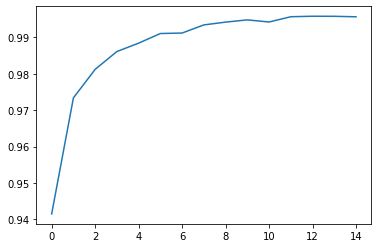

In [19]:
plt.plot(history.history['accuracy'])

## Plot the Training Accuracy and Validation Accuracy

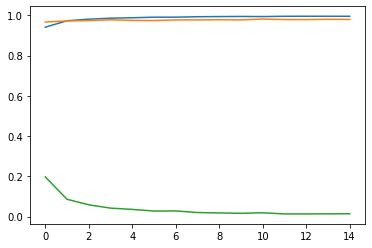

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating Model

In [21]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9798


In [22]:
score

[0.10972698777914047, 0.9797999858856201]

In [23]:
pediction = model.predict(X_test)

In [24]:
pediction[0][0]

1.195547e-23

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
pediction = np.argmax(pediction,axis=1)
y_test = np.argmax(y_test, axis=1)

In [27]:
print(confusion_matrix(pediction,y_test))

[[ 974    0    1    0    0    2    5    1    5    0]
 [   1 1125    2    0    0    0    2    5    1    3]
 [   0    2 1012    5    2    0    2    7    3    0]
 [   0    1    3  984    0    8    0    0    5    3]
 [   1    0    5    0  974    2   10    1    6   19]
 [   2    0    0    9    0  871    7    0    0    2]
 [   0    2    1    0    2    1  929    0    1    0]
 [   1    0    3    4    1    1    0 1010    2    9]
 [   1    5    5    3    0    5    3    2  947    1]
 [   0    0    0    5    3    2    0    2    4  972]]


In [28]:
print(classification_report(pediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.99      0.99      0.99      1139
           2       0.98      0.98      0.98      1033
           3       0.97      0.98      0.98      1004
           4       0.99      0.96      0.97      1018
           5       0.98      0.98      0.98       891
           6       0.97      0.99      0.98       936
           7       0.98      0.98      0.98      1031
           8       0.97      0.97      0.97       972
           9       0.96      0.98      0.97       988

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

